In [1]:
import os
import pickle
from tqdm import tqdm
import numpy as np
import pandas as pd
import scipy.stats
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.stats.multitest

import cubnm
import cubnm_paper

# set plots font and dpi
# Note: the font is not included in the repository
import matplotlib.font_manager
font_path = os.path.join(cubnm_paper.config.DATA_DIR, 'assets', 'Optima.ttc')
matplotlib.font_manager.fontManager.addfont(font_path)
font = matplotlib.font_manager.FontProperties(fname=font_path, size=12)
plt.rcParams.update({
    "font.family": font.get_name(),
    "figure.dpi": 600
})

thcolor = '#44546A'

# Load heritability estimates

Output CSVs (`output.csv`) have been calculated and created via `scripts/heritability/calculate_h2.py`.
Here we load them for plotting:

In [2]:
h2s = {}

SOLAR_ROOT = '/u/asaberi/projects/cubnm/data/hcp/solar_sesavg_nosingleton'
for analysis in sorted(os.listdir(SOLAR_ROOT)):
    print(analysis)
    solar_out = pd.read_csv(
        os.path.join(SOLAR_ROOT, analysis, 'output.csv'),
        index_col = 0
    )
    # drop duplicate rows (last index is duplicated in solar
    # output)
    solar_out = solar_out.loc[~solar_out.index.duplicated(keep='first')]
    # drop node- or edge- prefix
    if (
        solar_out.index[0].startswith('node')
        or solar_out.index[0].startswith('edge')
    ):
        solar_out.index = solar_out.index.map(lambda s: int(s.replace('node_','').replace('edge_','')))
    # sort by index
    solar_out = solar_out.sort_index()
    
    h2s[analysis] = solar_out

I_E
I_I
S_E
S_I
emp_fc_edge
emp_fc_strength
params
r_E
r_I
sc_edge
sc_strength
sim_fc_edge
sim_fc_strength


In [3]:
h2_maps = {}
for k in h2s.keys():
    if (k == 'params') or (k.endswith('edge')):
        continue
    h2_maps[k] = h2s[k]['h2r'].values
h2_maps = pd.DataFrame(h2_maps)

In [4]:
h2_maps

,I_E,I_I,S_E,S_I,emp_fc_strength,r_E,r_I,sc_strength,sim_fc_strength
0,0.303200,0.272132,0.341450,0.267084,0.364469,0.343762,0.267996,0.357932,0.304637
1,0.227307,0.284517,0.371624,0.272963,0.424100,0.362425,0.273826,0.550490,0.330898
2,0.344369,0.284577,0.399361,0.278582,0.449475,0.401503,0.279015,0.450957,0.323372
3,0.255351,0.278701,0.340397,0.266639,0.197471,0.339221,0.267580,0.538175,0.295489
4,0.302093,0.285916,0.390461,0.279478,0.424555,0.388506,0.280192,0.592466,0.326879
...,...,...,...,...,...,...,...,...,...
95,0.104523,0.198887,0.188713,0.194370,0.319393,0.165283,0.193715,0.248630,0.240118
96,0.267684,0.209954,0.230626,0.204577,0.247384,0.237103,0.206333,0.321383,0.207294
97,0.248090,0.206966,0.243939,0.205686,0.250879,0.244615,0.205949,0.239844,0.252883
98,0.298459,0.203920,0.301190,0.197483,0.433192,0.301699,0.197013,0.419353,0.287843


# Spatial pattern of h2 and association with SC h2

Using spin test:

In [5]:
r = {}
p = {}

cols = h2_maps.columns.tolist()
cols.remove('sc_strength')

for k in tqdm(cols):
    r[k], p[k] = cubnm_paper.utils.spin_test(h2_maps.loc[:, 'sc_strength'].values, h2_maps.loc[:, k].values)
    
res = pd.DataFrame({'r':r, 'p':p})
# apply FDR
_, res['p_fdr'] = statsmodels.stats.multitest.fdrcorrection(res['p'])
res.round(3)

  0%|          | 0/8 [00:00<?, ?it/s]

Please cite the following papers if you are using this function:
  [primary]:
    Alexander Schaefer, Ru Kong, Evan M Gordon, Timothy O Laumann, Xi-Nian Zuo, Avram J Holmes, Simon B Eickhoff, and BT Thomas Yeo. Local-global parcellation of the human cerebral cortex from intrinsic functional connectivity mri. Cerebral cortex, 28(9):3095–3114, 2018.
Dataset atl-schaefer2018 already exists. Skipping download.


 12%|█▎        | 1/8 [00:02<00:16,  2.42s/it]

Please cite the following papers if you are using this function:
  [primary]:
    Alexander Schaefer, Ru Kong, Evan M Gordon, Timothy O Laumann, Xi-Nian Zuo, Avram J Holmes, Simon B Eickhoff, and BT Thomas Yeo. Local-global parcellation of the human cerebral cortex from intrinsic functional connectivity mri. Cerebral cortex, 28(9):3095–3114, 2018.
Dataset atl-schaefer2018 already exists. Skipping download.


 25%|██▌       | 2/8 [00:04<00:14,  2.45s/it]

Please cite the following papers if you are using this function:
  [primary]:
    Alexander Schaefer, Ru Kong, Evan M Gordon, Timothy O Laumann, Xi-Nian Zuo, Avram J Holmes, Simon B Eickhoff, and BT Thomas Yeo. Local-global parcellation of the human cerebral cortex from intrinsic functional connectivity mri. Cerebral cortex, 28(9):3095–3114, 2018.
Dataset atl-schaefer2018 already exists. Skipping download.


 38%|███▊      | 3/8 [00:06<00:10,  2.18s/it]

Please cite the following papers if you are using this function:
  [primary]:
    Alexander Schaefer, Ru Kong, Evan M Gordon, Timothy O Laumann, Xi-Nian Zuo, Avram J Holmes, Simon B Eickhoff, and BT Thomas Yeo. Local-global parcellation of the human cerebral cortex from intrinsic functional connectivity mri. Cerebral cortex, 28(9):3095–3114, 2018.
Dataset atl-schaefer2018 already exists. Skipping download.


 50%|█████     | 4/8 [00:08<00:08,  2.12s/it]

Please cite the following papers if you are using this function:
  [primary]:
    Alexander Schaefer, Ru Kong, Evan M Gordon, Timothy O Laumann, Xi-Nian Zuo, Avram J Holmes, Simon B Eickhoff, and BT Thomas Yeo. Local-global parcellation of the human cerebral cortex from intrinsic functional connectivity mri. Cerebral cortex, 28(9):3095–3114, 2018.
Dataset atl-schaefer2018 already exists. Skipping download.


 62%|██████▎   | 5/8 [00:10<00:06,  2.08s/it]

Please cite the following papers if you are using this function:
  [primary]:
    Alexander Schaefer, Ru Kong, Evan M Gordon, Timothy O Laumann, Xi-Nian Zuo, Avram J Holmes, Simon B Eickhoff, and BT Thomas Yeo. Local-global parcellation of the human cerebral cortex from intrinsic functional connectivity mri. Cerebral cortex, 28(9):3095–3114, 2018.
Dataset atl-schaefer2018 already exists. Skipping download.


 75%|███████▌  | 6/8 [00:12<00:03,  2.00s/it]

Please cite the following papers if you are using this function:
  [primary]:
    Alexander Schaefer, Ru Kong, Evan M Gordon, Timothy O Laumann, Xi-Nian Zuo, Avram J Holmes, Simon B Eickhoff, and BT Thomas Yeo. Local-global parcellation of the human cerebral cortex from intrinsic functional connectivity mri. Cerebral cortex, 28(9):3095–3114, 2018.
Dataset atl-schaefer2018 already exists. Skipping download.


 88%|████████▊ | 7/8 [00:14<00:01,  1.99s/it]

Please cite the following papers if you are using this function:
  [primary]:
    Alexander Schaefer, Ru Kong, Evan M Gordon, Timothy O Laumann, Xi-Nian Zuo, Avram J Holmes, Simon B Eickhoff, and BT Thomas Yeo. Local-global parcellation of the human cerebral cortex from intrinsic functional connectivity mri. Cerebral cortex, 28(9):3095–3114, 2018.
Dataset atl-schaefer2018 already exists. Skipping download.


100%|██████████| 8/8 [00:16<00:00,  2.08s/it]


,r,p,p_fdr
I_E,-0.089,0.439,0.877
I_I,-0.004,0.975,0.975
S_E,0.160,0.179,0.477
S_I,-0.005,0.970,0.975
emp_fc_strength,0.206,0.095,0.477
r_E,0.163,0.172,0.477
r_I,-0.006,0.966,0.975
sim_fc_strength,0.073,0.640,0.975


# Plot

Store screenshots of surface plots as images (to later bind them in the figure via `imshow`):

In [ ]:
h2_imgs = {}

for k in tqdm(h2_maps.columns):
    plotter = cubnm_paper.utils.plot_parc(h2_maps.loc[:, k].values, clim=(0, 0.6))
    h2_imgs[k] = plotter.screenshot(transparent_background=True)

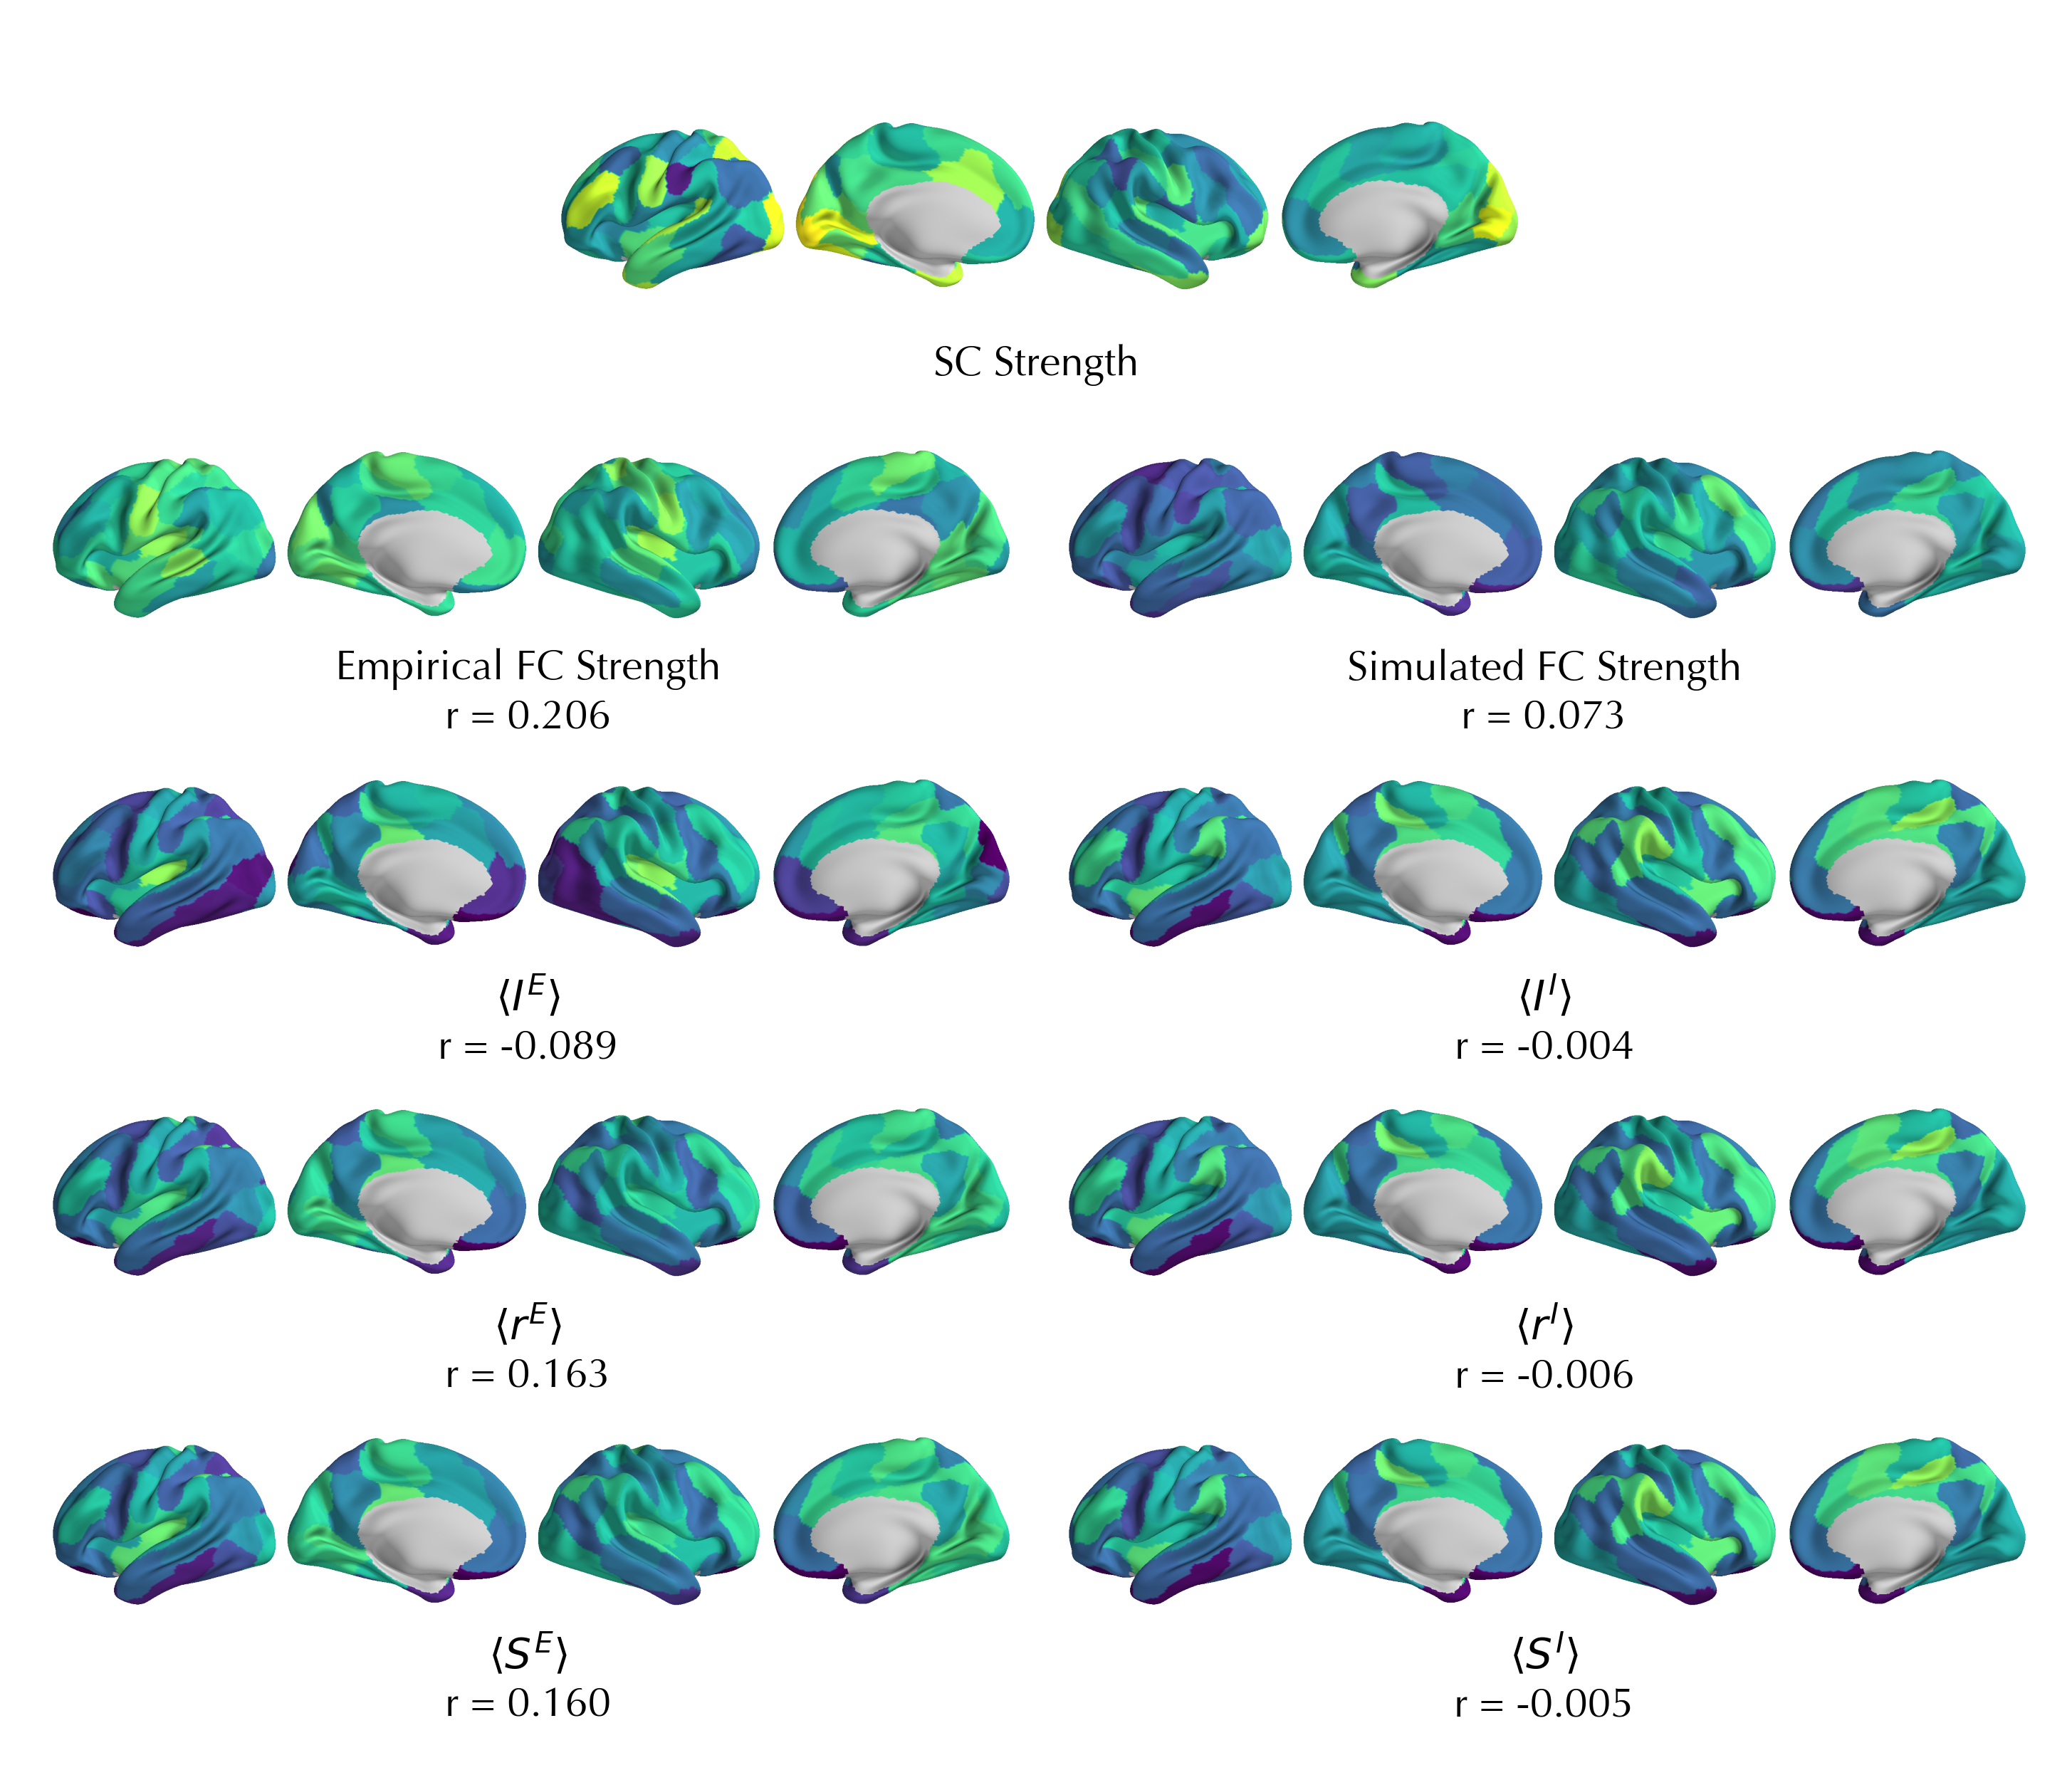

In [8]:
labels = {
    'sc_strength': 'SC Strength',
    'sim_fc_strength': 'Simulated FC Strength',
    'emp_fc_strength': 'Empirical FC Strength',
}
state_vars = ['I_E', 'r_E', 'S_E', 'I_I', 'r_I', 'S_I']
for var in state_vars:
    state_var, neuron = var.split('_')
    labels[var] = r'$\langle '+state_var+r'^'+neuron+r'\rangle$'


fig, axd = plt.subplot_mosaic(
    [
        ["space_l", "sc_strength", "sc_strength", "space_r"],
        ["emp_fc_strength"]*2+["sim_fc_strength"]*2,
        ["I_E"]*2+["I_I"]*2, 
        ["r_E"]*2+["r_I"]*2, 
        ["S_E"]*2+["S_I"]*2, 
    ],
    figsize=(6, 5.0),
)

fontsize = 7

for i_ax, k in enumerate(h2_imgs.keys()):
    ax = axd[k]
    im = ax.imshow(h2_imgs[k])
    ax.axis('off')
    text = labels.get(k, k)
    if k in res.index:
        text += f"\nr = {res.loc[k, 'r']:.3f}"
        if res.loc[k, 'p_fdr']<0.05:
            text+= "*"
    ax.text(
        ax.get_xlim()[1]/2,
        ax.get_ylim()[0]*1.15,
        text,
        va='center',
        ha='center',
        rotation=0,
        fontsize=fontsize
    )   


axd['space_l'].axis('off')
axd['space_r'].axis('off')


plt.subplots_adjust(wspace=0.1, hspace=0)
fig.savefig('h2_maps.png', transparent=True, bbox_inches='tight')

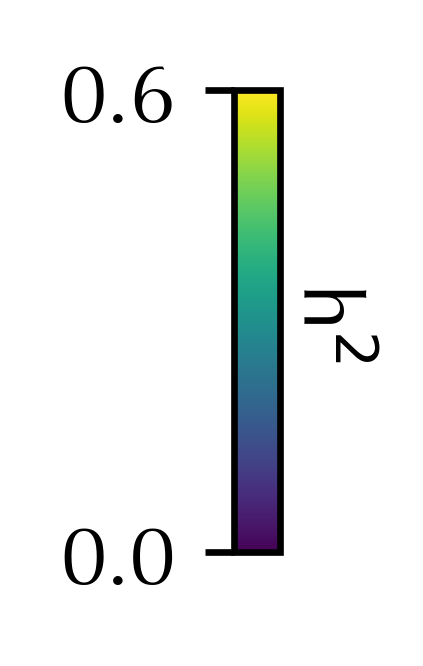

In [9]:
fig = cubnm_paper.utils.make_colorbar(0.0, 0.6, 'viridis', figsize=(2, 1), label=r'h$^2$');
fig.savefig('h2_cbar.svg', transparent=True, bbox_inches='tight')